In [111]:
import numpy as np
import pandas as pd

In [112]:
# Setting up KPIs
# Here we will load a csv from fao for Production (tonnes) and Area Harvested (hectares, ha)
# From these 2 values, we can calculate average global yield = Production/Area Harvested
# for each of the 4 crops
raw = pd.read_csv("FAOSTAT_data_2017&2018.csv")
# 1 - Tonnes from latest year (2018)
pdn_2018 = raw.loc[raw["Year Code"] == 2018, "Value"].sum()

# 2 - % Increase from previous (2017)
pdn_2017 = raw.loc[raw["Year Code"] == 2017, "Value"].sum()
pdn_inc = round(pdn_2017/pdn_2018*100, 2)

# 3 - Water consumption on agriculture
raw = pd.read_csv("aquastat_2013_2017.csv", encoding = 'latin-1')
water_total = raw.Value.sum()

In [113]:
# Setting up the dataframe
pdnrow = ("Rice", "Maize", "Potato", "Wheat")
pdncol = ("Water", "TempMin", "TempMax", "Production", "Area", "Yield", "Top", 
          "ProductionCountry", "Production%", "AreaCountry")
pdn = pd.DataFrame(np.zeros([len(pdnrow), len(pdncol)]))

pdn.index = pdnrow
pdn.columns = pdncol

In [114]:
# Maize is corn
# Water Intensity
# Approximate seasonal values 
# Information from 
# https://waterfootprint.org/media/downloads/Mekonnen-Hoekstra-2011-WaterFootprintCrops.pdf
# Table 3. Global average water footprint of primary crops and derived crop products. 
# Period: 1996–2005
# Measurements are in mm
#water = pd.DataFrame({"Rice": [450, 700], "Maize": [500, 800], "Potato": [500, 700], 
#                      "Wheat": [450, 650]})
pdn.loc[:, "Water"] =  [1673, 1222, 287, 1827]

In [115]:
# Temperature
# Information from Climatic Requirements for Field Crops
# https://www.yourarticlelibrary.com/crops/climatic-requirements-for-field-crops/77211
# There are different temperature requirements at different stages of a crop 
# e.g. germination/growth/flowering/grain formation
# Taking the optimum temperatures for rice, maize & wheat growth & tuberization for potato
# Measurements are in Celsius
#temp = pd.DataFrame({"Rice": [21, 36], "Maize": [30, 32], "Potato": [17, 20], 
#                     "Wheat": [20, 25]})
pdn.loc[:, ["TempMin", "TempMax"]] = [[21, 36], [30, 32], [17, 20], [20, 25]]

In [116]:
# Area Plantation
# Here we will load a csv from fao for Production (tonnes) and Area Harvested (hectares, ha)
# From these 2 values, we can calculate average global yield = Production/Area Harvested
# for each of the 4 crops
raw = pd.read_csv("FAOSTAT_data_2018.csv")
rawcol = ("Rice, paddy", "Maize", "Potatoes", "Wheat")

for x, y in zip(rawcol, pdnrow):
    p1 = raw[(raw.Element == "Production") & (raw.Item == x)]["Value"]
    a1 = raw[(raw.Element == "Area harvested") & (raw.Item == x)]["Value"]
    pdn.loc[y, "Production"] = int(p1/1000000)
    pdn.loc[y, "Area"] = int(a1/1000000)
    pdn.loc[y, "Yield"] = np.round(int(p1)/int(a1), 2)

In [117]:
# Top Contributors to World Supply
raw2 = pd.read_csv("FAOSTAT_data_2018_country.csv")
raw2.head()

for x, y in zip(rawcol, pdnrow):
    maxpdn = max(raw2[(raw2.Element == "Production") & (raw2.Item == x)].Value)
    country = raw2[raw2.Value == maxpdn].Area.values[0]
    pdn.loc[y, "Top"] = country
    pdn.loc[y, "ProductionCountry"] = int(maxpdn/1000000)
    pdn.loc[y, "Production%"] = int(maxpdn/1000000/pdn.Production[y] * 100)
    pdn.loc[y, "AreaCountry"] = raw2[(raw2.Element == "Area harvested") & (raw2.Item == x) & 
                                     (raw2.Area == country)].Value.values

In [118]:
# Time Series
# From 1961 to 2018, inclusive
raw = pd.read_csv("FAOSTAT_data_production.csv")
#raw.head()

In [119]:
prod_timeseries =  pd.DataFrame(np.zeros([58, 4]))
prod_timeseries.columns = pdnrow
prod_timeseries.index = list(range(1961, 2019))

for y in prod_timeseries.index:
    prod_timeseries.loc[y, ["Rice"]] = int(raw[(raw.Item == "Rice, paddy") & (raw.Year == y)].Value/1000000)
    prod_timeseries.loc[y, ["Maize"]] = int(raw[(raw.Item == "Maize") & (raw.Year == y)].Value/1000000)
    prod_timeseries.loc[y, ["Potato"]] = int(raw[(raw.Item == "Potatoes") & (raw.Year == y)].Value/1000000)
    prod_timeseries.loc[y, ["Wheat"]] = int(raw[(raw.Item == "Wheat") & (raw.Year == y)].Value/1000000)
    

#rawcol = ("Rice, paddy", "Maize", "Potatoes", "Wheat")

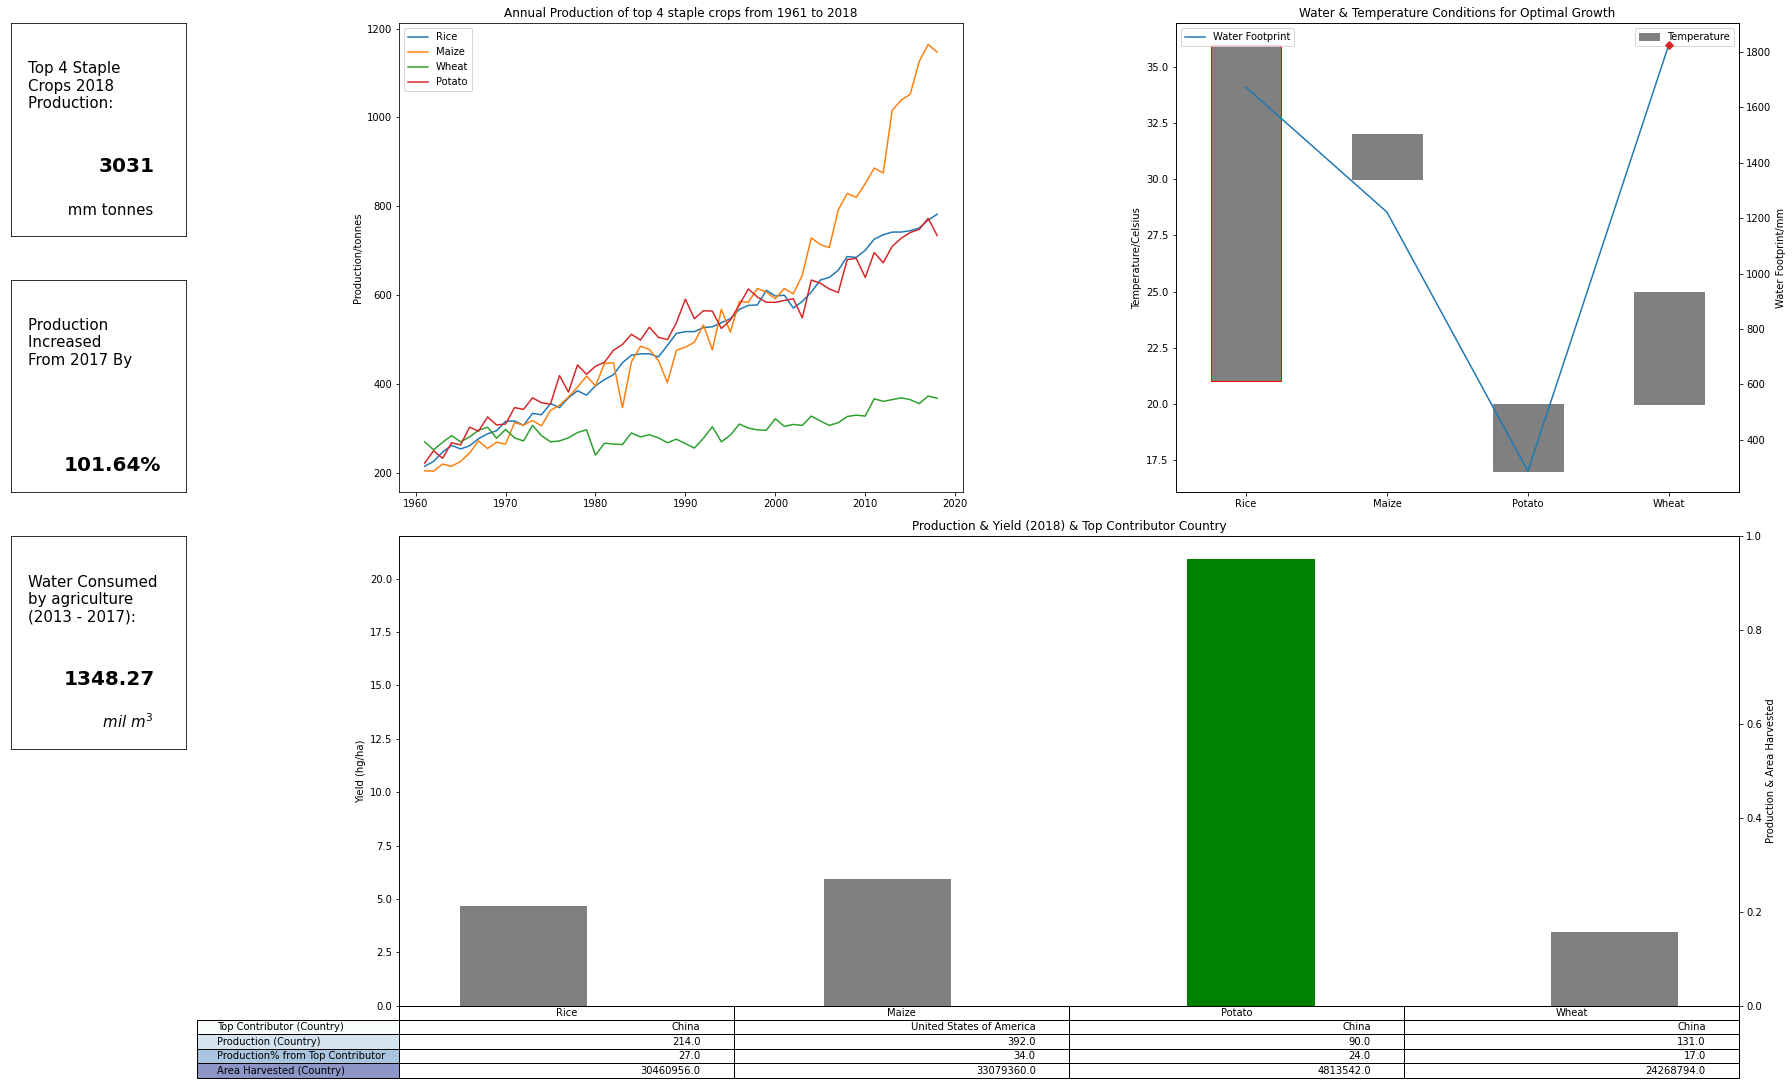

In [120]:
%matplotlib inline
# Writing latex in matplotlib
#https://matplotlib.org/3.1.1/tutorials/text/mathtext.html
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 5, figsize = (25, 15))
gs1 = ax[0, 1].get_gridspec()
gs2 = ax[3, 1].get_gridspec()
#gs2 = ax[3, 1].get_gridspec()

for col in range(1, 3):
    for subplot in ax[0:2, col]:
        subplot.remove()
axbig1 = fig.add_subplot(gs1[0:2, 1:3])

for col in range(3, 5):
    for subplot in ax[0:2, col]:
        subplot.remove()
axtopright = fig.add_subplot(gs1[0:2, 3:5])


for subplot in ax[2, 1:]:
    subplot.remove()
    
for subplot in ax[3, :]:
    subplot.remove()
    

axbig2 = fig.add_subplot(gs2[2:, 1:])


ax[0, 0].text(0.1, 0.6, ("Top 4 Staple \nCrops 2018 \nProduction: "), 
                  fontsize = 15
             )

ax[0, 0].text(0.5, 0.3, str(int(pdn_2018/1000000)),
                  fontsize = 20, fontweight = "bold"#, style = "oblique"
             )

ax[0, 0].text(0.3, 0.1, " mm tonnes", 
                  fontsize = 15)


ax[1, 0].text(0.1, 0.6, ("Production \nIncreased \nFrom 2017 By"), 
                  fontsize = 15
             )

ax[1, 0].text(0.3, 0.1, (str(round(pdn_inc, 2)) + "%"),
                  fontsize = 20, fontweight = "bold"
             )

ax[2, 0].text(0.1, 0.6, ("Water Consumed \nby agriculture \n(2013 - 2017): "), 
                  fontsize = 15
             )

ax[2, 0].text(0.3, 0.3, str(round(water_total, 2)),
                  fontsize = 20, fontweight = "bold"
             )

ax[2, 0].text(0.5, 0.1, (r' $mil$ $m^3$'), 
                  fontsize = 15)

ax[0, 0].set_xticks([]) #Remove xticks
ax[0, 0].set_yticks([]) #Remove yticks
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[2, 0].set_xticks([])
ax[2, 0].set_yticks([])

axbig1.plot(prod_timeseries)
axbig1.legend(("Rice", "Maize", "Wheat", "Potato"))
axbig1.title.set_text("Annual Production of top 4 staple crops from 1961 to 2018")
axbig1.set_ylabel("Production/tonnes")

ax1 = axtopright.twinx()
ax1.plot(pdn.Water, color = "tab:blue", label = "Water Footprint")
ax1.plot(3, pdn.Water["Wheat"], marker = "D", color = "tab:red")
ax1.legend()

for x, y in zip(pdnrow, range(len(pdnrow))):
    tempmin = pdn.TempMin[x]
    tempmax = pdn.TempMax[x]
    if (x == "Rice"):
        ec_temp = "red"
    else:
        ec_temp = "grey"
        
    v = axtopright.broken_barh([(-0.25 + 1*y, 0.5)], (tempmin, tempmax - tempmin), 
                         facecolor = "grey", edgecolor = ec_temp)

v.set_label("Temperature")

axtopright.set_xlim(-0.5, 3.5)
axtopright.set_xticks([0, 1, 2, 3])
axtopright.set_xticklabels(pdnrow)
axtopright.legend()
axtopright.set_ylabel("Temperature/Celsius")
ax1.set_ylabel("Water Footprint/mm")
axtopright.title.set_text("Water & Temperature Conditions for Optimal Growth")


"""
ax[0, 3].axis('tight')
ax[0, 4].axis('tight')
ax[0, 4].axis('tight')
ax[0, 4].axis('tight')

axbig1.annotate(("Besides the crop requirement, water footprint is dependent on several " +
                  "environmental factors. " + "\n" +
                  "E.g. Crops grown in higher temperatures will require more water " +
                  "due to evapo-transpiration."), 
                  xy = (3, 35),
                  xytext = (-0.5, 10), #textcoords = 'axes fraction',
                  arrowprops = dict(facecolor = 'black', shrink = 0.05),
                  fontsize = 10)
"""

ax3 = axbig2.twinx()
axbig2.bar((0, 1, 2, 3), pdn.Yield, width = 0.35, color = ("grey", "grey", "green", "grey"))
#ax3.plot(pdn.Production, c = "red")
#ax3.plot(pdn.Area, c = "black")
ax3.title.set_text("Production & Yield (2018) & Top Contributor Country")

ax3.set_ylabel("Production & Area Harvested")
axbig2.set_ylabel("Yield (hg/ha)")

rows = ["Top Contributor (Country)", "Production (Country)", 
        "Production% from Top Contributor", 
        "Area Harvested (Country)"]
axbig2.axis('tight')
axbig2.set_xticks([])
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(pdnrow)))
the_table = axbig2.table(cellText = np.transpose(pdn.loc[:, ["Top", "ProductionCountry", 
                                                "Production%", "AreaCountry"]].values), 
                         rowLabels = rows, rowColours = colors, 
                         colLabels = pdnrow, loc = "bottom")
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)

fig.tight_layout()
plt.show()